#  概述
## 集成算法
>通过在数据上构建多个模型，集成所有模型的结果，而不是单个机器学习算法。

|集成算法的目标|
| :-------|
| 集成算法会考虑多个评估器的建模结果，汇总得到一个结果上。以此老获取比单个模型更好的回归或者分类表现。|


多个模型集成成为的模型叫做模型评估器(ensemble estimator), 组成模型评估器的单个模型叫做基评估器


常见的集成算法有：  
+ 装袋法(bagging)
+ 提升法(Boosting)
+ stacking


![](images/2_1.png)

# 随机森林与决策树的对比

In [3]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [5]:
wine = load_wine()

In [6]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [10]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

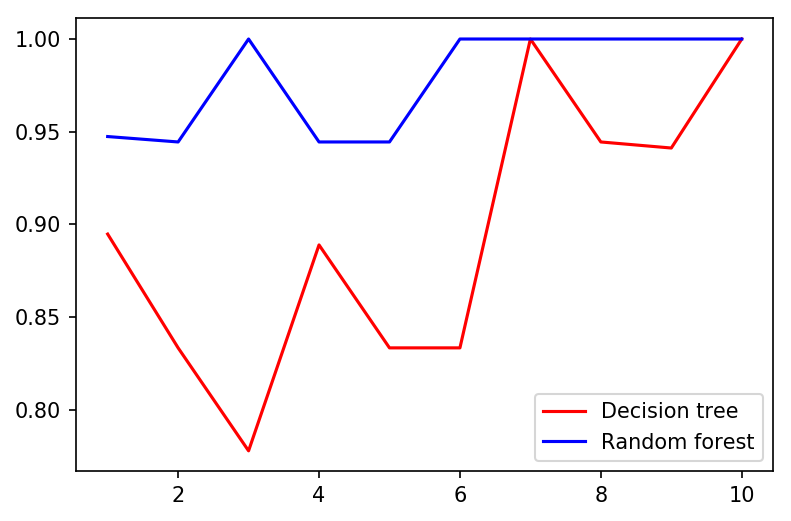

In [20]:
# 创建决策树
clf = DecisionTreeClassifier(random_state=0)
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

# 创建随机森林
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

plt.plot(range(1, 11), clf_s, '-r',label='Decision tree')
plt.plot(range(1, 11), rfc_s, '-b', label='Random forest')

plt.legend()
plt.show()

In [23]:
rfc.base_estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Random Forest:0.9671171171171171
Decision Tree:0.860051984757867


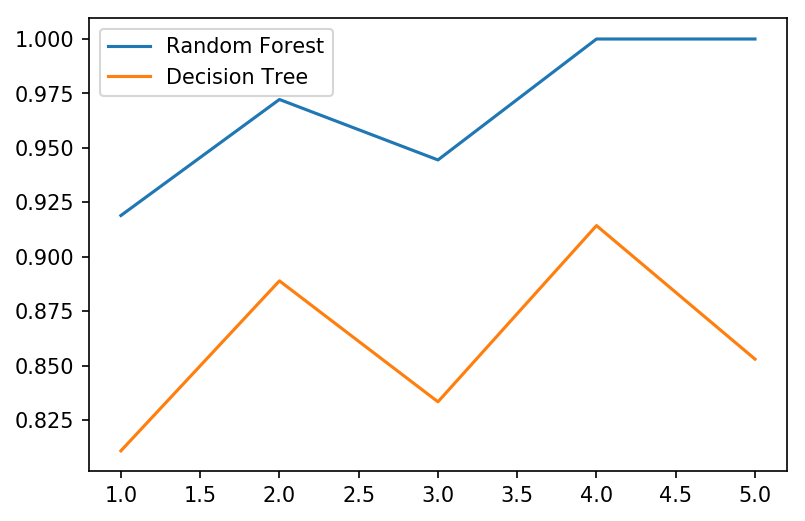

In [25]:
# 下面代码跟上面的结果一样，只是比较好玩
label = 'Random Forest'

for model in [RandomForestClassifier(n_estimators=100), DecisionTreeClassifier()]:
    s = cross_val_score(model, wine.data, wine.target, cv=5)
    print("{}:{}".format(label, s.mean()))
    plt.plot(range(1, 6), s, label=label)
    plt.legend()
    label = 'Decision Tree'
    

# 随机森林与决策书在十组交叉验证下的效果对比

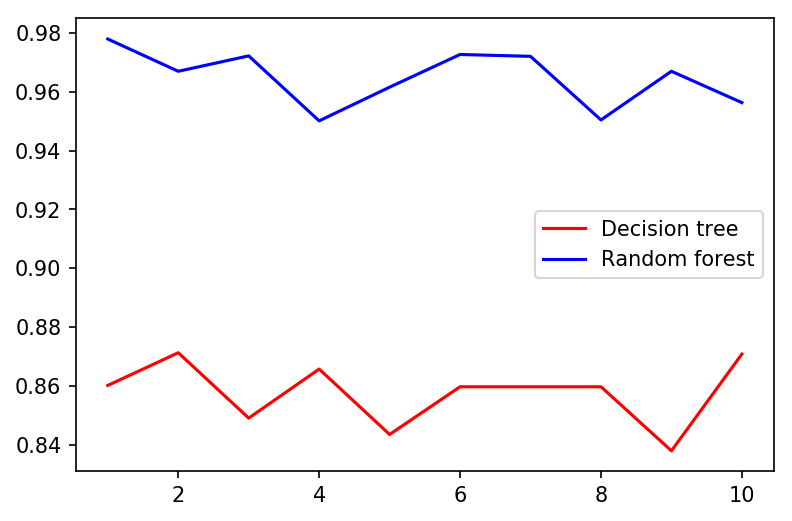

In [26]:
rfc_list = []
clf_list = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25, random_state=i)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=5)
    rfc_list.append(rfc_s.mean())
    
    clf = DecisionTreeClassifier(random_state=i)
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=5)
    clf_list.append(clf_s.mean())
    
plt.plot(range(1, 11), clf_list, '-r',label='Decision tree')
plt.plot(range(1, 11), rfc_list, '-b', label='Random forest')

plt.legend()
plt.show()

> 可以看出，随机森林一般都要比决策树好。单个决策树的波动与随机森林大多一致，因为随机森林是在决策树的基础上构建的。

# 重要参数

## n_estimators 的学习曲线

In [27]:
# receiving the return of cross_val_score mean
score_list = list()  

times = 200
for t in range(1, times+1):
    rfc = RandomForestClassifier(n_estimators=t, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=6)
    score_list.append(rfc_s.mean())
    
print('max score: {}, index：{}'.format(max(score_list),
                                       score_list.index(max(score_list))))


max score: 0.9888888888888889, index：98


TypeError: range() takes no keyword arguments

<Figure size 1800x750 with 0 Axes>

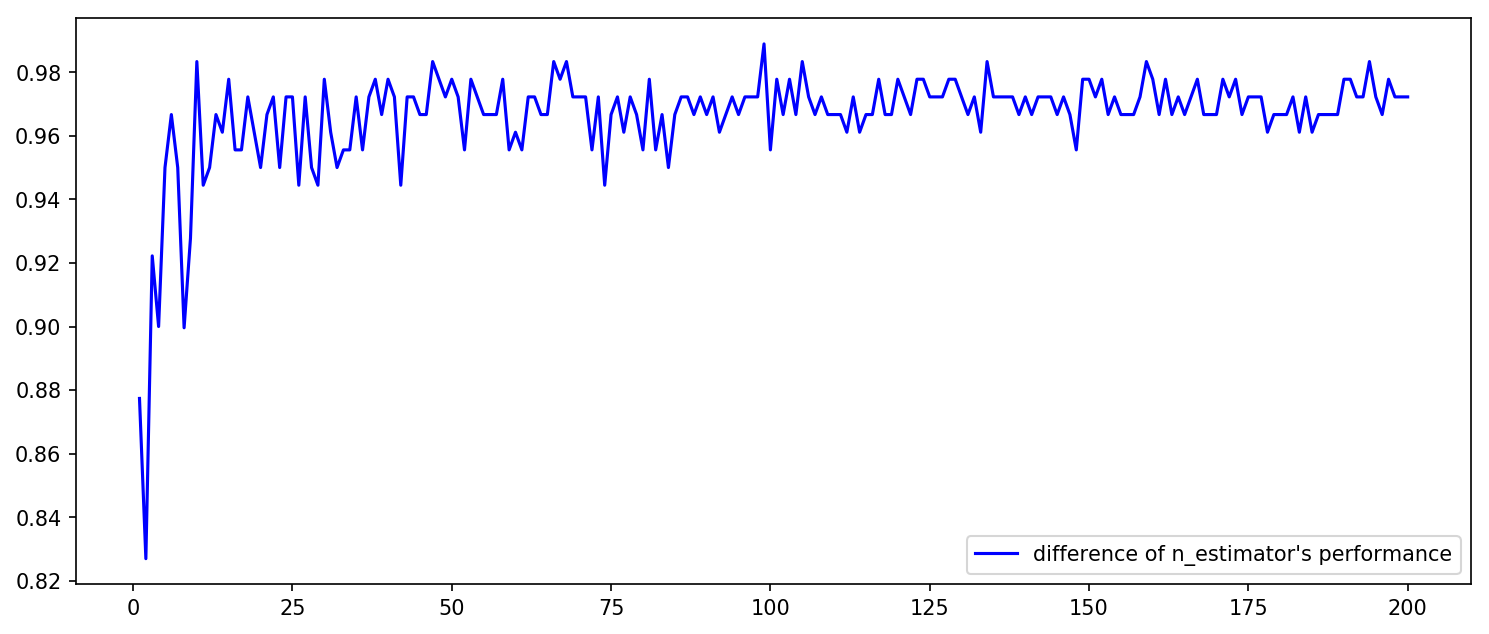

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, times+1), score_list, '-b',
              label='difference of n_estimator\'s performance')
plt.legend()
plt.show()

由上图我们可以知道，n_estimators达到一定的个数后，随机森林的效果会围绕一个值波动，所以，并非n_estimators 越大越好。越大也意味着要浪费更多的时间运行

## random_state


>先思考一个问题，随机森林用了什么方法保证了集成的效果要比单个分类器来的好呢？


随机森林的本质是装袋法，装袋集成算法是对集评估器的预测结果进行平均或者少数服从多数的原则进行集成评估结果的。  
例如，对于构建了25个集成评估器来说，只有在有13棵树或以上判断错误，随机森林才会判断错误。对于单棵树而言，其准确率在85%浮动(这里假设为80%)，则每棵树判断错误的概率为20%(设为$\epsilon$), 那么判断错误的概率为：
$$e_{random_forest} = \displaystyle \sum_{i=13}^{25}C_{25}^{i}\epsilon^i(1-\epsilon)^{25-i}$$

其中，i是判断错误的次数，也是判错的树的数量，ε是一棵树判断错误的概率，（1-ε）是判断正确的概率，共判对
25-i次。采用组合，是因为25棵树中，有任意i棵都判断错误.

In [50]:
import numpy as np 
from scipy.special import comb
import math

def proba_of_error(n_estimators, epsilon):
    """
    计算随机森林算法错误的概率
    
    Parameters
    ----------
    n_estimators : int
        基评估器的个数
    
    epsilon : float
        单个基评估器发送错误的概率
    
    Returns
    -------
    error : 随机森林算法发生错误的概率
    """
    
    middle = math.ceil(n_estimators / 2)
    errors = [comb(n_estimators, i) * 
              epsilon**i * 
              ((1 - epsilon)**(n_estimators - i)) 
              for i in range(middle, n_estimators+1)]
    return sum(errors)

In [51]:
proba_of_error(25, 0.2)

0.0003690480345558283

可见，判断错误的几率非常小，这让随机森林在红酒数据集上的表现远远好于单棵决策树。  

那现在就有一个问题了：我们说袋装法服从多数表决原则或对基分类器结果求平均，这即是说，我们默认森林中的
每棵树应该是不同的，并且会返回不同的结果。设想一下，如果随机森林里所有的树的判断结果都一致（全判断对
或全判断错），那随机森林无论应用何种集成原则来求结果，都应该无法比单棵决策树取得更好的效果才对。但我
们使用了一样的类DecisionTreeClassifier，一样的参数，一样的训练集和测试集，为什么随机森林里的众多树会有
不同的判断结果？

这是因为sklearn中的分类树DecisionTreeClassifier本身带有随机性，这样使得每棵决策树都不一样。   
我们知道随机森林的集评估器就算决策树，当随机森林(RandomForestClassifier)中的参数设置了random_state，这不是意味每一个基评估器的random_state都设置一样。  

随机森林的random_state的设置了生成的森林随机模式，而不是森林中的一颗树。


## rfc.estimators_ 查看森林中树的情况

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(wine.data,
                                                     wine.target, 
                                                     test_size=0.3)

rfc = RandomForestClassifier(n_estimators=25, random_state=1)
rfc = rfc.fit(X_train, y_train)

In [54]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1791095845, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=2135392491, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                 

In [56]:
rfc.estimators_[0].get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1791095845, splitter='best')>

In [57]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1791095845
2135392491
946286476
1857819720
491263
550290313
1298508491
2143362693
630311759
1013994432
396591248
1703301249
799981516
1666063943
1484172013
729053692
1704103302
1870626073
166716594
1487394068
1800426750
1345499493
795511698
105433556
878115723


我们可以观察到，当random_state固定时，随机森林中生成是一组固定的树，但每棵树依然是不一致的，这是
用”随机挑选特征进行分枝“的方法得到的随机性。并且我们可以证明，当这种随机性越大的时候，袋装法的效果一
般会越来越好。用袋装法集成时，**基分类器应当是相互独立的，是不相同的。**  

但这种做法的局限性是很强的，当我们需要成千上万棵树的时候，数据不一定能够提供成千上万的特征来让我们构
筑尽量多尽量不同的树。因此，除了random_state。我们还需要其他的随机性